# Investigate RF results
we have run '07a i - run RF.py and can now investigate the results from the run

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from src.postproces_classificationresults import *
from src.plotting import *
from src.preproces import Handle_Files

import pickle

file_handler = Handle_Files()
model_name = 'RF'

start by importing the result dictionaries

In [2]:
dict_dir = f'D:/Programmering/msc/Masterthesis_S23-Results/dicts/{model_name}'

with open('/'.join([dict_dir, f'classification_summaries_{model_name}.pkl']), 'rb') as file:
    classification_summaries = pickle.load(file)

with open('/'.join([dict_dir, f'target_summaries_{model_name}.pkl']), 'rb') as file:
    target_summaries = pickle.load(file)

with open('/'.join([dict_dir, f'roc_information_{model_name}.pkl']), 'rb') as file:
    roc_information = pickle.load(file)

Firstly we have the performance plots that gives us and overview

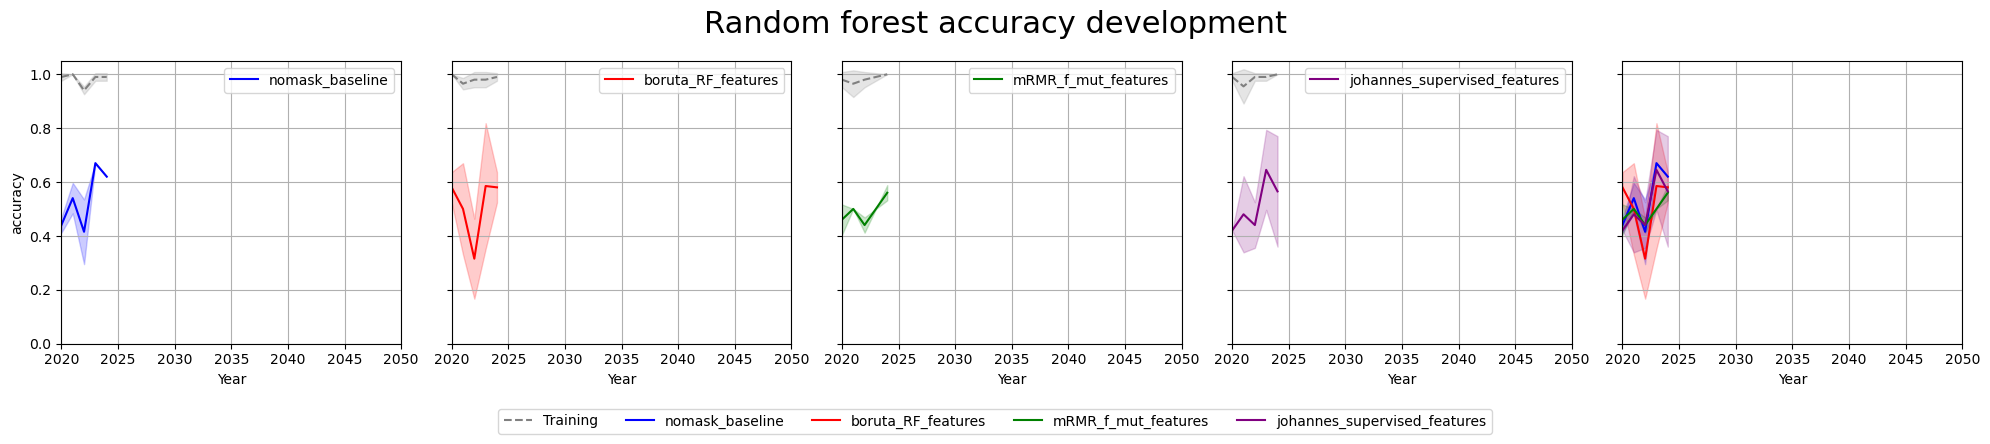

In [3]:
plot_performance(classification_summaries, metric='accuracy', years=list(range(2020, 2051)), 
                 model_name='Random Forest', spread=True, 
                 summary_subplot_for_spread=True, include_train=True)

- The overall development shows that all feature selections have an increased ability to classify as the time goes by. 
- The uncertainty given by the shaded area is narrower for all classifiers leter in the period

- the top 10 features from mRMR, f_classif and mutual information scores gives the worst over all perfomance, 
- boruta gives the smoothes, 
- supervised mby the highest 

to further investigate we start by looking into the roc curves and auc metric 

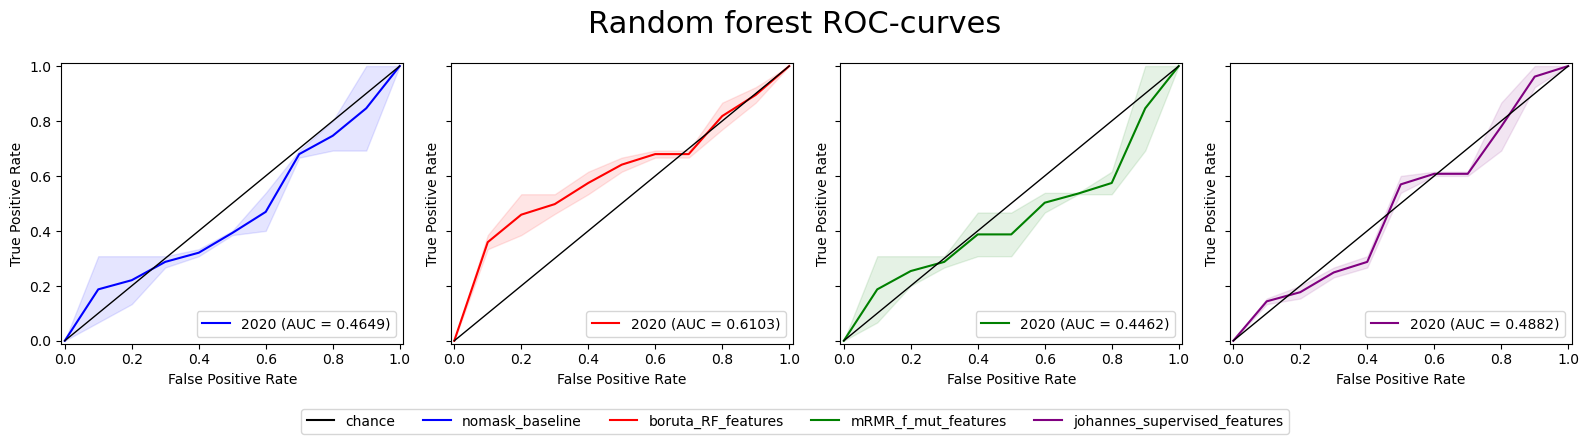

In [6]:
plot_roc_curve(roc_information, years=[2020], 
               model_name='Random Forest', title=None, 
               spread=True, summary_subplot_for_spread=False)